# Getting Started Code for [Chunin Exams Food Track- CV'2021](https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021) on AIcrowd
#### Author : Rohit Jamuar


## Download Necessary Packages 📚

In [9]:
!pip install aicrowd-cli

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 163kB 11.0MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 204kB 11.5MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [10]:
API_KEY = "cc31ca4645fecf33e78ff11aaf7d7eac" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:21<00:00, 35.1MB/s]
test_images.zip: 100% 33.9M/33.9M [00:01<00:00, 24.8MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 943kB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 752kB/s]


In [11]:
#!cp /content/*.csv  /content/drive/MyDrive/assignment5/
#!cp /content/*.zip  /content/drive/MyDrive/assignment5/ 

#!unzip /content/drive/MyDrive/assignment5/train_images.zip -d /content/drive/MyDrive/assignment5/ 
#!unzip /content/drive/MyDrive/assignment5/test_images.zip -d /content/drive/MyDrive/assignment5/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

np.random.seed(1)


In [ ]:
import os
import cv2
HEIGHT=224
WIDTH=224
#!cp -r /content/drive/MyDrive/assignment5 ./
train_path="/content/drive/MyDrive/assignment5/train_images"
test_path="/content/drive/MyDrive/assignment5/test_images/"


train_df = pd.read_csv("/content/drive/MyDrive/assignment5/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/assignment5/test.csv")


In [ ]:
API_KEY = "cc31ca4645fecf33e78ff11aaf7d7eac" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY
!rm -rf data
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021
!unzip train_images.zip
!unzip test_images.zip

In [13]:
train_path = '/content/train_images/'
test_path = '/content/test_images/'
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [14]:
## Processing training data
# -> appending images in a list 'train_images'
#



train_images = []       
train_labels = []
shape = (100,100)  
#train_path = '../input/fruit-images-for-object-detection/train_zip/train'


train_className=train_df['ClassName']
trainUnqClss= np.unique(np.array(train_className))
trainDict={}
counter=0
for i in trainUnqClss :
    trainDict[i]=counter
    counter=counter+1
    
    
fileind = dict(zip(train_df['ImageId'],train_df['ClassName']))  
for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        img=img/255
       # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        train_images.append(img)
        train_labels.append(trainDict[fileind[filename]])
        

55


{'almonds': 0,
 'apple': 1,
 'avocado': 2,
 'banana': 3,
 'beer': 4,
 'biscuits': 5,
 'boisson-au-glucose-50g': 6,
 'bread-french-white-flour': 7,
 'bread-sourdough': 8,
 'bread-white': 9,
 'bread-whole-wheat': 10,
 'bread-wholemeal': 11,
 'broccoli': 12,
 'butter': 13,
 'carrot': 14,
 'cheese': 15,
 'chicken': 16,
 'chips-french-fries': 17,
 'coffee-with-caffeine': 18,
 'corn': 19,
 'croissant': 20,
 'cucumber': 21,
 'dark-chocolate': 22,
 'egg': 23,
 'espresso-with-caffeine': 24,
 'french-beans': 25,
 'gruyere': 26,
 'ham-raw': 27,
 'hard-cheese': 28,
 'honey': 29,
 'jam': 30,
 'leaf-spinach': 31,
 'mandarine': 32,
 'mayonnaise': 33,
 'mixed-nuts': 34,
 'mixed-salad-chopped-without-sauce': 35,
 'mixed-vegetables': 36,
 'onion': 37,
 'parmesan': 38,
 'pasta-spaghetti': 39,
 'pickle': 40,
 'pizza-margherita-baked': 41,
 'potatoes-steamed': 42,
 'rice': 43,
 'salad-leaf-salad-green': 44,
 'salami': 45,
 'salmon': 46,
 'sauce-savoury': 47,
 'soft-cheese': 48,
 'strawberries': 49,
 'sweet

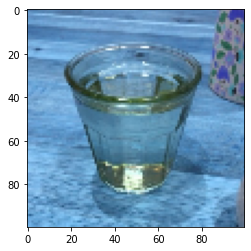

In [15]:
# Visualizing Training data
print(train_labels[9001])
plt.imshow(train_images[9001])
trainDict

In [16]:
# Converting labels into One Hot encoded sparse matrix
train_labels=to_categorical(train_labels)

train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
#2.Adding new layers

In [ ]:

# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 206s 1s/step - loss: 3.8765 - acc: 0.0942 - val_loss: 3.3923 - val_acc: 0.1686
Epoch 2/20
140/140 [==============================] - 203s 1s/step - loss: 3.2894 - acc: 0.2009 - val_loss: 3.1867 - val_acc: 0.2102
Epoch 3/20
140/140 [==============================] - 202s 1s/step - loss: 2.9218 - acc: 0.2650 - val_loss: 3.1017 - val_acc: 0.2360
Epoch 4/20
140/140 [==============================] - 202s 1s/step - loss: 2.4882 - acc: 0.3497 - val_loss: 3.1569 - val_acc: 0.2282
Epoch 5/20
140/140 [==============================] - 202s 1s/step - loss: 1.8121 - acc: 0.5141 - val_loss: 3.4121 - val_acc: 0.2085
Epoch 6/20
140/140 [==============================] - 201s 1s/step - loss: 1.0153 - acc: 0.7245 - val_loss: 4.1616 - val_acc: 0.1999
Epoch 7/20
140/140 [==============================] - 203s 1s/step - loss: 0.4355 - acc: 0.8876 - val_loss: 4.8649 - val_acc: 0.1785
Epoch 8/20
140/140 [==============================] - 202s 1s/step - 

In [ ]:
print(np.array(x_val).shape)
print(np.array(y_val).shape)

(2331, 100, 100, 3)
(2331, 61)


In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

73/73 [==============================] - 16s 222ms/step - loss: 7.4436 - acc: 0.1849
[7.4435577392578125, 0.18489918112754822]


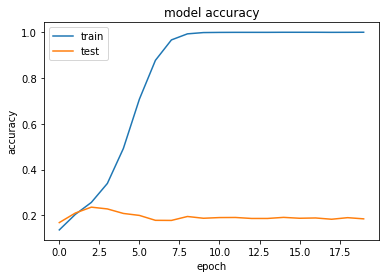

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
reverseDict={}
l1=[]
l2=[]
for key in trainDict:
    l1.append(trainDict[key])
    l2.append(key)

reverseDict = dict(zip(l1,l2))
print(reverseDict)

{0: 'almonds', 1: 'apple', 2: 'avocado', 3: 'banana', 4: 'beer', 5: 'biscuits', 6: 'boisson-au-glucose-50g', 7: 'bread-french-white-flour', 8: 'bread-sourdough', 9: 'bread-white', 10: 'bread-whole-wheat', 11: 'bread-wholemeal', 12: 'broccoli', 13: 'butter', 14: 'carrot', 15: 'cheese', 16: 'chicken', 17: 'chips-french-fries', 18: 'coffee-with-caffeine', 19: 'corn', 20: 'croissant', 21: 'cucumber', 22: 'dark-chocolate', 23: 'egg', 24: 'espresso-with-caffeine', 25: 'french-beans', 26: 'gruyere', 27: 'ham-raw', 28: 'hard-cheese', 29: 'honey', 30: 'jam', 31: 'leaf-spinach', 32: 'mandarine', 33: 'mayonnaise', 34: 'mixed-nuts', 35: 'mixed-salad-chopped-without-sauce', 36: 'mixed-vegetables', 37: 'onion', 38: 'parmesan', 39: 'pasta-spaghetti', 40: 'pickle', 41: 'pizza-margherita-baked', 42: 'potatoes-steamed', 43: 'rice', 44: 'salad-leaf-salad-green', 45: 'salami', 46: 'salmon', 47: 'sauce-savoury', 48: 'soft-cheese', 49: 'strawberries', 50: 'sweet-pepper', 51: 'tea', 52: 'tea-green', 53: 'tom

In [ ]:
predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])
        

62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  bread-wholemeal
3636cb3fc3.jpg
Predicted :-  banana
1af2f3f062.jpg
Predicted :-  chicken
b9d0e34a4f.jpg
Predicted :-  bread-wholemeal
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  water
a31fc638ba.jpg
Predicted :-  mixed-vegetables
d5e685f830.jpg
Predicted :-  bread-white
58d4e4c8a1.jpg
Predicted :-  cheese
d808c27bfe.jpg
Predicted :-  water
25e87d561c.jpg
Predicted :-  mixed-vegetables
c9579834fd.jpg
Predicted :-  bread-french-white-flour
231e87900b.jpg
Predicted :-  tomato-sauce
82c042d01d.jpg
Predicted :-  salad-leaf-salad-green
af1e7a6c10.jpg
Predicted :-  cheese
7f5041231f.jpg
Predicted :-  water
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  hard-cheese
97d58dd0e5.jpg
Predicted :-  pizza-margherita-baked
8aa1337489.jpg
Predicted :-  beer
32dd79e40c.jpg
Predicted :-  egg
8abe0a8428.jpg
Predicted :-  water
60b3db4f3a.jpg
Predicted :-  salad-leaf-salad-green
952cdc26cd.jpg
Predicted 

In [18]:
#1. With Batch Norm
# Creating a Sequential model
from keras.layers import Dropout
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))	


Epoch 1/20
140/140 [==============================] - 171s 1s/step - loss: 4.3902 - acc: 0.1035 - val_loss: 3.8501 - val_acc: 0.1214
Epoch 2/20
140/140 [==============================] - 170s 1s/step - loss: 3.5182 - acc: 0.1814 - val_loss: 3.6576 - val_acc: 0.1441
Epoch 3/20
140/140 [==============================] - 172s 1s/step - loss: 3.0132 - acc: 0.2400 - val_loss: 3.6890 - val_acc: 0.1622
Epoch 4/20
140/140 [==============================] - 172s 1s/step - loss: 2.5623 - acc: 0.3218 - val_loss: 4.4337 - val_acc: 0.1519
Epoch 5/20
140/140 [==============================] - 172s 1s/step - loss: 2.1036 - acc: 0.4199 - val_loss: 4.6357 - val_acc: 0.1441
Epoch 6/20
140/140 [==============================] - 172s 1s/step - loss: 1.6940 - acc: 0.5160 - val_loss: 4.8023 - val_acc: 0.1459
Epoch 7/20
140/140 [==============================] - 171s 1s/step - loss: 1.2710 - acc: 0.6443 - val_loss: 5.1023 - val_acc: 0.1321
Epoch 8/20
140/140 [==============================] - 173s 1s/step - 

In [19]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)

73/73 [==============================] - 14s 189ms/step - loss: 9.3738 - acc: 0.1630
[9.373827934265137, 0.16302016377449036]


In [20]:
predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

62d2ea7747.jpg
Predicted :-  bread-wholemeal
fd6ab69a63.jpg
Predicted :-  ham-raw
3636cb3fc3.jpg
Predicted :-  tea
1af2f3f062.jpg
Predicted :-  water
b9d0e34a4f.jpg
Predicted :-  salami
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  water
a31fc638ba.jpg
Predicted :-  tomato
d5e685f830.jpg
Predicted :-  espresso-with-caffeine
58d4e4c8a1.jpg
Predicted :-  tomato
d808c27bfe.jpg
Predicted :-  water
25e87d561c.jpg
Predicted :-  avocado
c9579834fd.jpg
Predicted :-  bread-white
231e87900b.jpg
Predicted :-  butter
82c042d01d.jpg
Predicted :-  bread-wholemeal
af1e7a6c10.jpg
Predicted :-  tomato-sauce
7f5041231f.jpg
Predicted :-  coffee-with-caffeine
1ae217abf1.jpg
Predicted :-  strawberries
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  salami
8aa1337489.jpg
Predicted :-  beer
32dd79e40c.jpg
Predicted :-  cheese
8abe0a8428.jpg
Predicted :-  water
60b3db4f3a.jpg
Predicted :-  mixed-salad-chopped-without-sauce
952cdc26cd.jpg
Predicted :-  coffee-wi

In [ ]:
#3. With Dropout

In [25]:
	#1. With Batch Norm
# Creating a Sequential model
from keras.layers import Dropout
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 172s 1s/step - loss: 4.4710 - acc: 0.0926 - val_loss: 3.8574 - val_acc: 0.1180
Epoch 2/20
140/140 [==============================] - 171s 1s/step - loss: 3.4590 - acc: 0.1836 - val_loss: 3.7416 - val_acc: 0.1489
Epoch 3/20
140/140 [==============================] - 171s 1s/step - loss: 3.0178 - acc: 0.2458 - val_loss: 3.4112 - val_acc: 0.1900
Epoch 4/20
140/140 [==============================] - 171s 1s/step - loss: 2.5273 - acc: 0.3323 - val_loss: 3.3213 - val_acc: 0.1986
Epoch 5/20
140/140 [==============================] - 170s 1s/step - loss: 2.1609 - acc: 0.4153 - val_loss: 4.4854 - val_acc: 0.1913
Epoch 6/20
140/140 [==============================] - 171s 1s/step - loss: 1.7732 - acc: 0.5095 - val_loss: 3.7641 - val_acc: 0.2008
Epoch 7/20
140/140 [==============================] - 170s 1s/step - loss: 1.4908 - acc: 0.5743 - val_loss: 4.6871 - val_acc: 0.1845
Epoch 8/20
140/140 [==============================] - 170s 1s/step - 

In [26]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 14s 187ms/step - loss: 6.7402 - acc: 0.1909
[6.74017333984375, 0.19090518355369568]
62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  bread-white
3636cb3fc3.jpg
Predicted :-  hard-cheese
1af2f3f062.jpg
Predicted :-  bread-wholemeal
b9d0e34a4f.jpg
Predicted :-  egg
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  tea
a31fc638ba.jpg
Predicted :-  sauce-savoury
d5e685f830.jpg
Predicted :-  honey
58d4e4c8a1.jpg
Predicted :-  tomato
d808c27bfe.jpg
Predicted :-  tomato
25e87d561c.jpg
Predicted :-  butter
c9579834fd.jpg
Predicted :-  mixed-salad-chopped-without-sauce
231e87900b.jpg
Predicted :-  tomato
82c042d01d.jpg
Predicted :-  bread-wholemeal
af1e7a6c10.jpg
Predicted :-  chicken
7f5041231f.jpg
Predicted :-  jam
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  salad-leaf-salad-green
8aa1337489.jpg
Predicted :-  beer
32dd79e40c.jpg
Predicted :-  chicken
8a

In [ ]:
#Different activation functions at the end

In [27]:
	#4.Different activation functions at the end
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
140/140 [==============================] - 166s 1s/step - loss: 3.8594 - acc: 0.1345 - val_loss: 3.7735 - val_acc: 0.0708
Epoch 2/20
140/140 [==============================] - 166s 1s/step - loss: 2.9330 - acc: 0.2643 - val_loss: 3.5473 - val_acc: 0.1476
Epoch 3/20
140/140 [==============================] - 166s 1s/step - loss: 2.1450 - acc: 0.4256 - val_loss: 3.2771 - val_acc: 0.1828
Epoch 4/20
140/140 [==============================] - 164s 1s/step - loss: 1.1681 - acc: 0.6970 - val_loss: 3.4621 - val_acc: 0.2141
Epoch 5/20
140/140 [==============================] - 164s 1s/step - loss: 0.5066 - acc: 0.8736 - val_loss: 4.3345 - val_acc: 0.2231
Epoch 6/20
140/140 [==============================] - 164s 1s/step - loss: 0.2123 - acc: 0.9508 - val_loss: 5.1245 - val_acc: 0.2274
Epoch 7/20
140/140 [==============================] - 164s 1s/step - loss: 0.0860 - acc: 0.9821 - val_loss: 5.6451 - val_acc: 0.2184
Epoch 8/20
140/140 [==============================] - 164s 1s/step - 

In [28]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 13s 176ms/step - loss: 6.9844 - acc: 0.2347
[6.984370708465576, 0.2346632331609726]
62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  croissant
3636cb3fc3.jpg
Predicted :-  water
1af2f3f062.jpg
Predicted :-  coffee-with-caffeine
b9d0e34a4f.jpg
Predicted :-  bread-sourdough
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  coffee-with-caffeine
a31fc638ba.jpg
Predicted :-  almonds
d5e685f830.jpg
Predicted :-  bread-wholemeal
58d4e4c8a1.jpg
Predicted :-  bread-french-white-flour
d808c27bfe.jpg
Predicted :-  wine-red
25e87d561c.jpg
Predicted :-  salad-leaf-salad-green
c9579834fd.jpg
Predicted :-  butter
231e87900b.jpg
Predicted :-  tomato-sauce
82c042d01d.jpg
Predicted :-  water
af1e7a6c10.jpg
Predicted :-  water
7f5041231f.jpg
Predicted :-  white-coffee-with-caffeine
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  rice
8aa1337489.jpg
Predicted :-  beer
3

In [ ]:
#5.Different activation functions at the end
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

In [29]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 13s 181ms/step - loss: 6.9844 - acc: 0.2347
[6.984370708465576, 0.2346632331609726]
62d2ea7747.jpg
Predicted :-  carrot
fd6ab69a63.jpg
Predicted :-  croissant
3636cb3fc3.jpg
Predicted :-  water
1af2f3f062.jpg
Predicted :-  coffee-with-caffeine
b9d0e34a4f.jpg
Predicted :-  bread-sourdough
da4611c65a.jpg
Predicted :-  water
d5df1ab5ec.jpg
Predicted :-  coffee-with-caffeine
a31fc638ba.jpg
Predicted :-  almonds
d5e685f830.jpg
Predicted :-  bread-wholemeal
58d4e4c8a1.jpg
Predicted :-  bread-french-white-flour
d808c27bfe.jpg
Predicted :-  wine-red
25e87d561c.jpg
Predicted :-  salad-leaf-salad-green
c9579834fd.jpg
Predicted :-  butter
231e87900b.jpg
Predicted :-  tomato-sauce
82c042d01d.jpg
Predicted :-  water
af1e7a6c10.jpg
Predicted :-  water
7f5041231f.jpg
Predicted :-  white-coffee-with-caffeine
1ae217abf1.jpg
Predicted :-  carrot
afd4cdd8fe.jpg
Predicted :-  coffee-with-caffeine
97d58dd0e5.jpg
Predicted :-  rice
8aa1337489.jpg
Predicted :-  beer
3

In [22]:
	#6. Different pooling strategies
# Creating a Sequential model
from keras.layers import AveragePooling2D
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))


Epoch 1/20
140/140 [==============================] - 170s 1s/step - loss: 4.3433 - acc: 0.0913 - val_loss: 3.9890 - val_acc: 0.1094
Epoch 2/20
140/140 [==============================] - 167s 1s/step - loss: 3.4781 - acc: 0.1753 - val_loss: 3.5651 - val_acc: 0.1570
Epoch 3/20
140/140 [==============================] - 167s 1s/step - loss: 3.0694 - acc: 0.2422 - val_loss: 3.5977 - val_acc: 0.1510
Epoch 4/20
140/140 [==============================] - 168s 1s/step - loss: 2.5279 - acc: 0.3276 - val_loss: 3.5991 - val_acc: 0.1725
Epoch 5/20
140/140 [==============================] - 165s 1s/step - loss: 2.0325 - acc: 0.4388 - val_loss: 5.0048 - val_acc: 0.1231
Epoch 6/20
140/140 [==============================] - 165s 1s/step - loss: 1.5692 - acc: 0.5595 - val_loss: 4.9253 - val_acc: 0.1858
Epoch 7/20
140/140 [==============================] - 165s 1s/step - loss: 1.1355 - acc: 0.6859 - val_loss: 4.8013 - val_acc: 0.1870
Epoch 8/20
140/140 [==============================] - 165s 1s/step - 

In [25]:
	# Evaluating model on validation data
	evaluate = model.evaluate(x_val,y_val)
	print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

73/73 [==============================] - 14s 187ms/step - loss: 9.1194 - acc: 0.1720
[9.119426727294922, 0.17202916741371155]
f8961bffbe.jpg
Predicted :-  tea
589b21a1da.jpg
Predicted :-  water-mineral
d52466324a.jpg
Predicted :-  water
dd7edf9405.jpg
Predicted :-  water
0c3bf8b3bb.jpg
Predicted :-  tea
0920aa3bf3.jpg
Predicted :-  apple
26b261b6b0.jpg
Predicted :-  water-mineral
4f5991c6b7.jpg
Predicted :-  strawberries
6c2eaa8a44.jpg
Predicted :-  strawberries
231e87900b.jpg
Predicted :-  tomato
6c3af2ee6c.jpg
Predicted :-  butter
71e61d2081.jpg
Predicted :-  tomato
4fe65083b2.jpg
Predicted :-  salami
75789955cc.jpg
Predicted :-  croissant
3c092b6869.jpg
Predicted :-  tomato
b9bec06826.jpg
Predicted :-  water
68e4399d82.jpg
Predicted :-  water
1064b4277e.jpg
Predicted :-  egg
8ac612f3f2.jpg
Predicted :-  salad-leaf-salad-green
3636cb3fc3.jpg
Predicted :-  water-mineral
3f73c055c3.jpg
Predicted :-  hard-cheese
3ee6561df0.jpg
Predicted :-  coffee-with-caffeine
00befedd19.jpg
Predicted 

In [28]:
#7.Different optimizers
# Creating a Sequential model
from keras.layers import AveragePooling2D
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )




# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)




predictions=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        print(filename)
        img=img/255
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
       # print(np.array(img).shape)
        x=[]
        x.append(img)
        predict = model.predict(np.array(x))
        print("Predicted :- ",reverseDict[np.argmax(predict)])
        predictions.append(reverseDict[np.argmax(predict)])

Epoch 1/20
140/140 [==============================] - 169s 1s/step - loss: 4.3556 - acc: 0.1028 - val_loss: 3.8400 - val_acc: 0.1055
Epoch 2/20
140/140 [==============================] - 168s 1s/step - loss: 3.5619 - acc: 0.1663 - val_loss: 3.5717 - val_acc: 0.1544
Epoch 3/20
140/140 [==============================] - 168s 1s/step - loss: 3.1067 - acc: 0.2255 - val_loss: 3.6899 - val_acc: 0.1480
Epoch 4/20
140/140 [==============================] - 169s 1s/step - loss: 2.5683 - acc: 0.3227 - val_loss: 3.7320 - val_acc: 0.1467
Epoch 5/20
140/140 [==============================] - 168s 1s/step - loss: 2.0986 - acc: 0.4221 - val_loss: 4.0830 - val_acc: 0.1742
Epoch 6/20
140/140 [==============================] - 168s 1s/step - loss: 1.6366 - acc: 0.5329 - val_loss: 4.5418 - val_acc: 0.1742
Epoch 7/20
140/140 [==============================] - 167s 1s/step - loss: 1.2245 - acc: 0.6487 - val_loss: 4.5396 - val_acc: 0.1746
Epoch 8/20
140/140 [==============================] - 167s 1s/step - 

In [ ]:
!rm -rf data
!mkdir data


'rm' is not recognized as an internal or external command,
operable program or batch file.


## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 13.1/11.5 KB • 1.4 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/stage-prediction/submissions/125933              │
│                  │                                                                                                         │
│  All submissions │ https://w